# Regular Genomics Project **RNA Localisation**


In [1]:
from keras.optimizers import Nadam
from keras.losses import KLDivergence

from utils import prepare_data, set_variables
from plotting import plot_line_graph
from metrics import pearson
from models import CNN

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'CNN_architecture1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

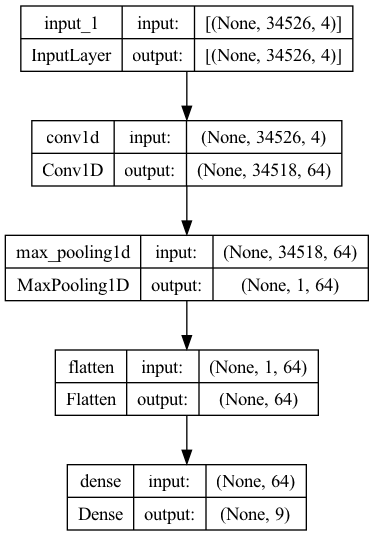

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            optimizer=Nadam(),
            loss=KLDivergence(),
            metrics=[pearson]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/3
 21/311 [=>............................] - ETA: 33s - loss: 0.2800 - pearson: -0.0345

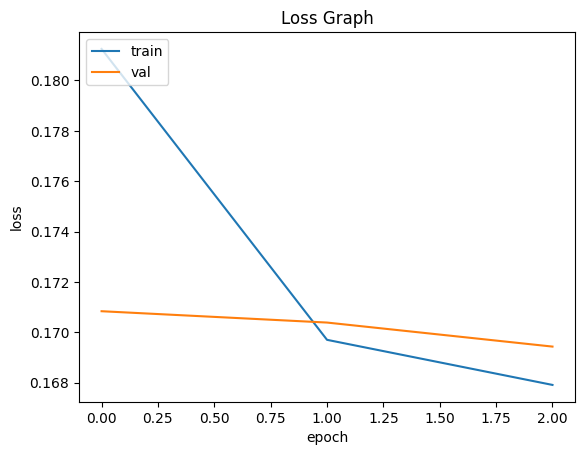

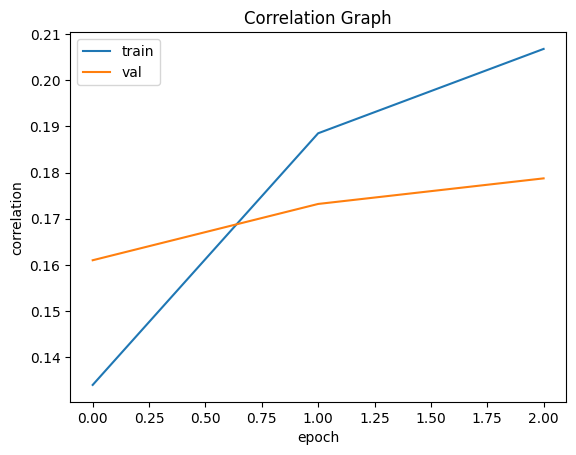

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])

In [8]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)